* ML09 ニューラルネットワーク
  * tensorflow をインストールする
  * Google Colab はインストール済み

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.6.5
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Model: "or_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
1/1 - 0s - loss: 1.0154 - accuracy: 0.2500
Epoch 2/5000
1/1 - 0s - loss: 1.0094 - accuracy: 0.2500
Epoch 3/5000
1/1 - 0s - loss: 1.0034 - accuracy: 0.2500
Epoch 4/5000
1/1 - 0s - loss: 0.9975 - accuracy: 0.2500
Epoch 5/5000
1/1 - 0s - loss: 0.9917 - accuracy: 0.2500
Epoch 6/5000
1/1 - 0s - loss: 0.9860 - accuracy: 0.2500
Epoch 7/5000
1/1 - 0s - loss: 0.9803 - accuracy: 0.2500
Epoch 8/5000
1/1 - 0s - loss: 0.9747 - accuracy: 0.2500
Epoch 9/5000
1/1 - 0s - loss: 0.9691 - accuracy: 0.2500
Epoch 10/5000
1/1 - 0s - loss: 0.9636 - accuracy: 0.2500
Epoch 11/5000
1/1 - 0s - loss: 0.9582 - accuracy: 0.2500
Epoch 12/5000
1/1 - 0s - loss: 0.9528 - 

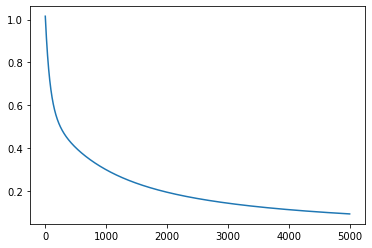

In [14]:
# 論理和を学習するためのデータを準備
x = np.array([[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])  # x1 と x2 の入力を 4パターン準備
y = np.array([[0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]])  # True/False の出力を準備

# ニューラルネットワークのモデルを作成 (サマリを表示)
or_model = tf.keras.models.Sequential(name='or_model')
or_model.add(tf.keras.layers.Dense(input_dim=2, units=2, activation='softmax'))
or_model.summary()

# compile関数でモデルをコンパイルし、fit関数で学習を実施 (学習中のlossの変化をグラフで表示)
or_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = or_model.fit(x, y, epochs=5000, verbose=2)
plt.plot(history.history['loss'])

# 学習で利用したデータと、モデルで推測した結果を表示
print(x)
print(or_model.predict(x, verbose=0))

In [10]:
print(or_model.get_layer)


<bound method Model.get_layer of <keras.engine.sequential.Sequential object at 0x000002620645CDF0>>


In [3]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロード
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 学習用データを読み込み、特徴量は 0-1 の範囲に正規化、ターゲットは one-hot ベクトル化
iris_data = load_iris()
x = preprocessing.scale(iris_data["data"])
print(x[:3])
y = np.identity(3)[iris_data["target"]]
print(y[:3])

# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
x_train:112 x_test:38 y_train:112 y_test:38


Model: "iris_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
iris data: accuracy_score: train data : 0.98214  test data : 0.97368


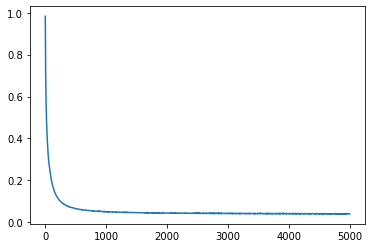

In [4]:
# ニューラルネットワークのモデルを作成 (サマリを表示)
iris_model = tf.keras.models.Sequential(name='iris_model')
iris_model.add(tf.keras.layers.Dense(input_dim=4, units=16, activation='relu'))
iris_model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
iris_model.summary()

# compile関数でモデルをコンパイルし、fit関数で学習を実施 (学習中のlossの変化をグラフで表示)
iris_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = iris_model.fit(x_train, y_train, epochs=5000, batch_size=10, verbose=0)
plt.plot(history.history['loss'])

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = iris_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = iris_model.evaluate(x_test, y_test, verbose=0)
print(f'iris data: accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

In [5]:
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

# 特徴量は 0-1 の範囲に正規化、ターゲットは one-hot ベクトル化
iris_data = load_iris()
x = x / 255
print(x[0])
y = np.identity(10)[y]
print(y[:3])

# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.16862746
 0.5803922  0.7882353  0.99215686 0.99215686 0.7

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
525/525 [==============================] - 2s 1ms/step - loss: 1.0510 - accuracy: 0.7604
Epoch 2/50
525/525 [==============================] - 1s 1ms/step - loss: 0.4910 - accuracy: 0.8779: 0s - loss: 0.5067 - accuracy: 
Epoch 3/50
525/525 [==============================] - 1s 1ms/step - loss: 0.3944 - accuracy: 0.8970
Epoch 4/50
525/525 [==============================] - 1s 1ms/step - loss: 0.3461 - accuracy: 0.9036
Epoch 5/50
525/525 [==============================] - 1s 1ms/step - loss: 0.313

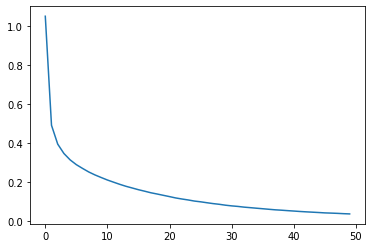

In [6]:
# ニューラルネットワークのモデルを作成 (サマリを表示)
mnist_model = tf.keras.models.Sequential(name='mnist_model')
mnist_model.add(tf.keras.layers.Dense(input_dim=784, units=784, activation='relu'))
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
mnist_model.summary()

# compile関数でモデルをコンパイルし、fit関数で学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = mnist_model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1)
plt.plot(history.history['loss'])

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')